In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils

In [2]:
def displayColorImage(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), interpolation="nearest")
    plt.title(title)
    plt.show()

In [3]:
def displayGrayScaleImage(image, title):
    plt.imshow(image, cmap='gray', vmin = 0.0, vmax = 255.0)
    plt.title(title)
    plt.show()

### Draw image

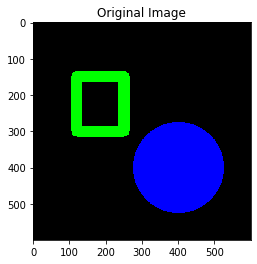

In [4]:
surface = np.zeros((600,600,3), dtype="uint8")
green = (0, 255, 0)
cv2.rectangle(surface, (250,300), (120,150), green, 30)
cv2.circle(surface, (400,400), 50, (255,0,0), 150)
displayColorImage(surface, "Original Image")


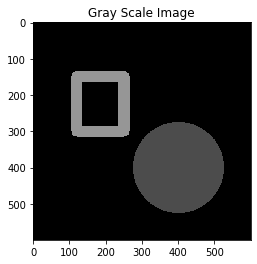

In [5]:
# Convert it to grayscale
gray = cv2.cvtColor(cv2.cvtColor(surface, cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2GRAY)
displayGrayScaleImage(gray, "Gray Scale Image")

### Finding Coontours and drawing contours

In [6]:
ct = cv2.findContours(gray.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
ct = imutils.grab_contours(ct)
print("Here are the contours".format(ct))
cl = surface.copy()
cv2.drawContours(cl, ct, -1, (0,0,255),5)


Here are the contours


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

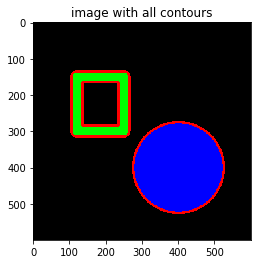

In [7]:
displayColorImage(cl, "image with all contours")

### Draw only external contours

Here are the contours


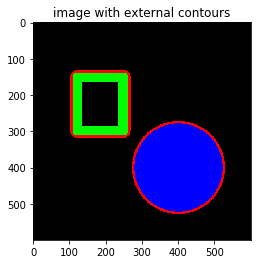

In [8]:
ct = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
ct = imutils.grab_contours(ct)
print("Here are the contours".format(ct))
cl = surface.copy()
cv2.drawContours(cl, ct, -1, (0,0,255),5)
displayColorImage(cl, "image with external contours")

### Isolating objects

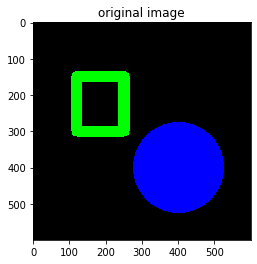

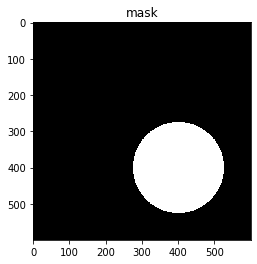

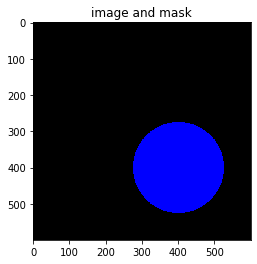

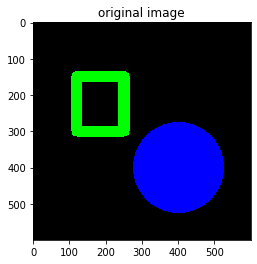

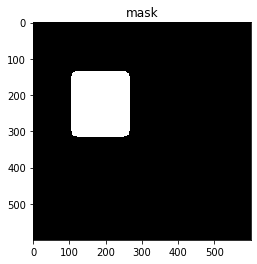

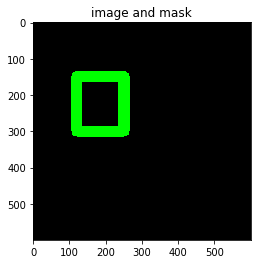

In [9]:
for c in ct:
    m = np.zeros(gray.shape, dtype="uint8")
    cv2.drawContours(m, [c], -1, 255, -1)
    displayColorImage(surface, "original image")
    displayGrayScaleImage(m, "mask")
    displayColorImage(cv2.bitwise_and(surface, surface, mask=m), "image and mask")
    

### Bounding Rectangle 

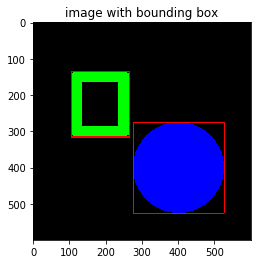

In [10]:
cl = surface.copy()

for c in ct:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(cl,(x,y), (x+w, y+h), (0,0,255),2)

displayColorImage(cl, "image with bounding box")   

### Rotated Bounding Box Demo

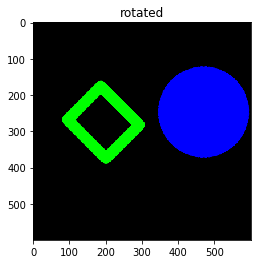

In [11]:
#get center of image
(height, width) = surface.shape[:2]
(centerX, centerY) = (width / 2, height / 2)
Modified = cv2.getRotationMatrix2D((centerX-50, centerY-60), 45, 1.0)
postRotation = cv2.warpAffine(surface, Modified, (width, height))
displayColorImage(postRotation, "rotated")

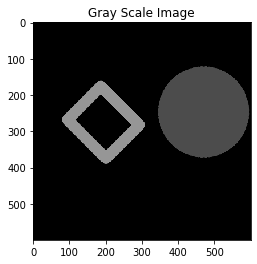

In [12]:
# Convert it to grayscale
gray = cv2.cvtColor(cv2.cvtColor(postRotation, cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2GRAY)
displayGrayScaleImage(gray, "Gray Scale Image")

Here are the contours


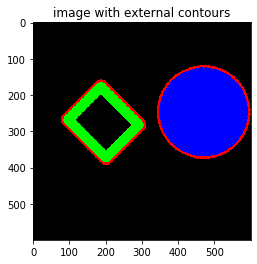

In [13]:
ct = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
ct = imutils.grab_contours(ct)
print("Here are the contours".format(ct))
cl = postRotation.copy()
cv2.drawContours(cl, ct, -1, (0,0,255),5)
displayColorImage(cl, "image with external contours")

### Normal Bounding Box

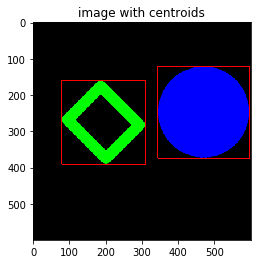

In [14]:
cl = postRotation.copy()

for c in ct:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(cl,(x,y), (x+w, y+h), (0,0,255),2)

displayColorImage(cl, "image with centroids")

### Rotated Bound BOX

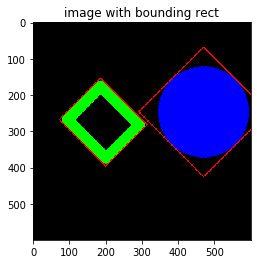

In [15]:
cl = postRotation.copy()
for c in ct:
    box = cv2.minAreaRect(c)
    box = np.int0(cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box))
    cv2.drawContours(cl,[box],-1,(0,0,255),2)
displayColorImage(cl, "image with bounding rect") 

### Draw a bounding Circle

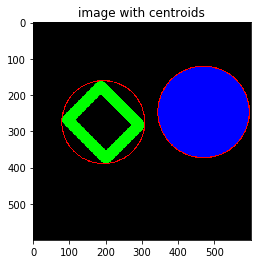

In [16]:
cl = postRotation.copy()
for c in ct:
    ((x,y),r) = cv2.minEnclosingCircle(c)
    cv2.circle(cl,(int(x), int(y)), int(r),(0,0,255),2)
displayColorImage(cl, "image with centroids") 